In [5]:
import numpy as np

# we generate n samples with m datapoints in them, each from a different normal distribution
n = 4
m = 10

sets = []

# we randomly assign the mean and dev of each sample and generate m samples 
np.random.seed(1357)
for i in range(n):
    sets.append([])

    mean = np.random.uniform(0, 1)*5
    dev = np.random.uniform(0, 1)*2

    for j in range(m):
        sets[i].append( np.random.normal(mean, dev) )


# dealing with negative readings due to microarray data not having negative values
temp = 0
for i in range(n):
    for j in range(m):
        if sets[i][j] < temp and sets[i][j] < 0:
            temp = sets[i][j]

for i in range(n):
    for j in range(m):
        sets[i][j] -= temp
    

print("generated data:\n", sets)

generated data:
 [[1.806133879379212, 1.421842835771262, 1.3090511149637365, 6.090143540669697, 0.7192673196423585, 2.6946155416167037, 1.8674538629093456, 1.2697562461617007, 1.163702106293449, 3.220296312370068], [1.4430399930843594, 0.6640840486863135, 2.0444856089752066, 0.8541111340304894, 0.2133494423292217, 1.6120218342164834, 1.3399879639862156, 2.2975162682768504, 2.448588571449535, 1.0831081984715611], [0.0, 0.5018103501166857, 1.3434296825868839, 1.0424451215013277, 1.2932401053318665, 2.532021941539779, 1.7163824760837358, 2.3513802232739565, 2.9313854259661087, 2.0905112433708632], [3.1259040726582508, 6.605249913190244, 3.3174178037453173, 3.395049641833554, 4.115352602566963, 7.7933012471983885, 7.265337253848681, 3.688779320395178, 4.836164868728188, 7.634074315902429]]


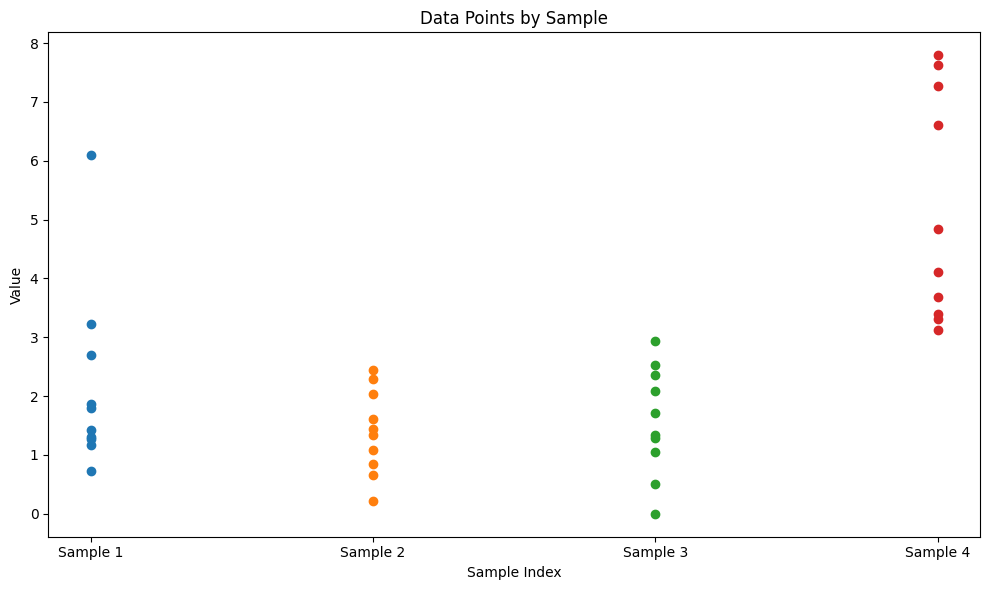

In [6]:
import matplotlib.pyplot as plt

def plot_vertical_dots(data):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, array in enumerate(data):
        x_coords = [i] * m
        y_coords = array
        ax.scatter(x_coords, y_coords)

    ax.set_xticks(range(n))
    ax.set_xticklabels([f"Sample {i+1}" for i in range(n)])

    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Value")
    ax.set_title("Data Points by Sample")

    fig.tight_layout()

    plt.show()


plot_vertical_dots(sets)


## Normalization methods

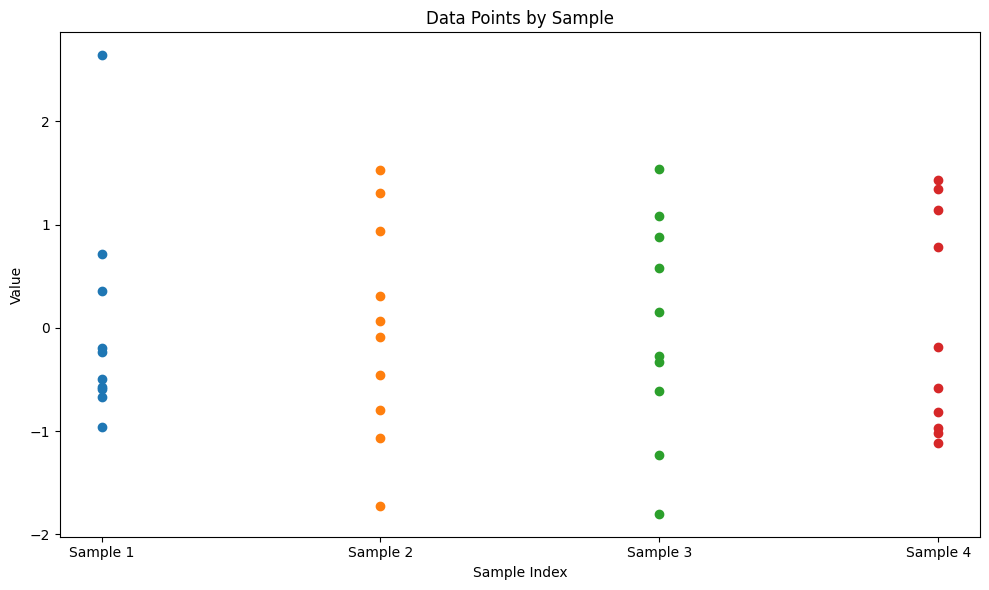

In [7]:
########### Z-normalization

"""
here you just take every sample individually and get its mean and standard deviation
then substract each value in the sample by its mean and divide it by its standard deviation afterwards
"""

def Znorm(sample):
    # calc mean
    mean = 0
    for i in range(len(sample)):
        mean += sample[i]
    mean = mean/len(sample)

    # calc std div
    div = 0
    for i in range(len(sample)):
        div += (sample[i] - mean)**2
    div = np.sqrt(div/len(sample))

    # normalize sample
    result = []
    for i in range(len(sample)):
        result.append( (sample[i] - mean)/div )
    return result

# making function to apply normalization to all samples
def norm1(samples):
    results = []
    for i in range(len(samples)):
        results.append( Znorm(samples[i]) )
    return results

norm_samples1 = norm1(sets)

plot_vertical_dots(norm_samples1)

[0.7192673196423585, 1.163702106293449, 1.2697562461617007, 1.3090511149637365, 1.421842835771262, 1.806133879379212, 1.8674538629093456, 2.6946155416167037, 3.220296312370068, 6.090143540669697]
[0.2133494423292217, 0.6640840486863135, 0.8541111340304894, 1.0831081984715611, 1.3399879639862156, 1.4430399930843594, 1.6120218342164834, 2.0444856089752066, 2.2975162682768504, 2.448588571449535]
[0.0, 0.5018103501166857, 1.0424451215013277, 1.2932401053318665, 1.3434296825868839, 1.7163824760837358, 2.0905112433708632, 2.3513802232739565, 2.532021941539779, 2.9313854259661087]
[3.1259040726582508, 3.3174178037453173, 3.395049641833554, 3.688779320395178, 4.115352602566963, 4.836164868728188, 6.605249913190244, 7.265337253848681, 7.634074315902429, 7.7933012471983885]


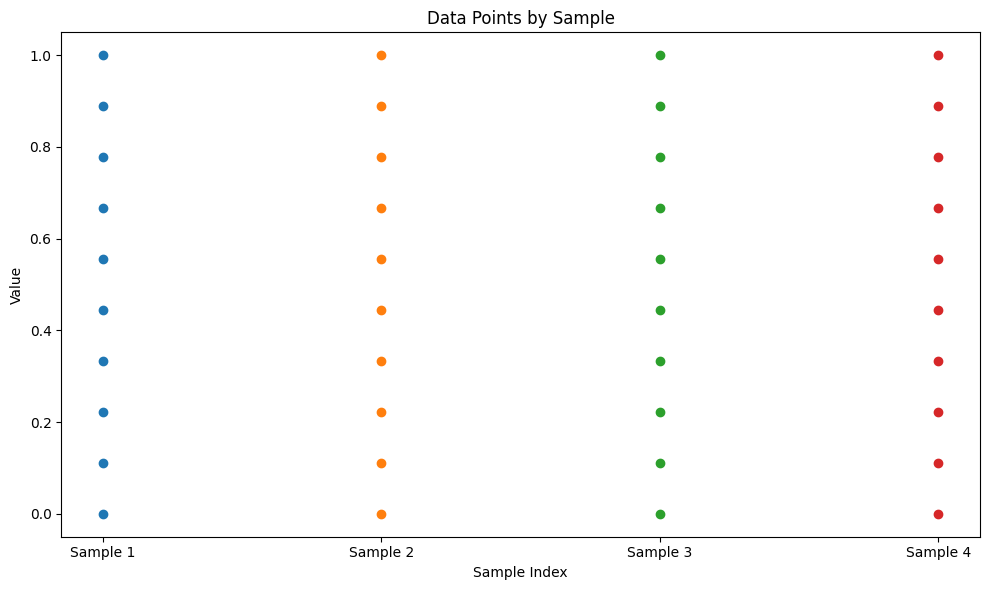

In [8]:
########### Uniform ranking

"""
You go thru each sample, you sort them and then you arrange them from 1 to 0 uniformly
"""

def norm2(samples):
    results = []
    for i in range(len(samples)):
        results.append( samples[i] )
        results[i].sort()
        print(results[i])

        for j in range(len(results[i])):
            results[i][j] = j/(len(samples[i])-1)

    return results


norm_samples2 = norm2(sets)

plot_vertical_dots(norm_samples2)